In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_small.csv')

In [ ]:
df.info()

print('\n')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149217 entries, 0 to 149216
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   themes         149217 non-null  object
 1   process_id     149217 non-null  object
 2   file_name      149217 non-null  object
 3   document_type  149217 non-null  object
 4   pages          149217 non-null  int64 
 5   body           149217 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.8+ MB




,themes,process_id,file_name,document_type,pages,body
0,[232],AI_856934,AI_856934_1926210_1060_17072013.pdf,outros,1,"{""tribunal justiça estado bahia poder judiciár..."
1,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,1,"{""excelentíssimo senhor doutor juiz direito ju..."
2,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,2,"{""razões recurso inominado recorrente atlantic..."
3,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,3,"{""empresa recorrente tornou credora dos débito..."
4,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,4,"{""entretanto verdade parte apelante tornou tit..."


In [ ]:
num_valores_unicos = df['document_type'].nunique()
print(f"A coluna 'document_type' tem {num_valores_unicos} valores únicos.")

valores_unicos = df['document_type'].unique()
print(f"\nOs valores únicos na coluna 'document_type' são: {valores_unicos}")


A coluna 'document_type' tem 6 valores únicos.

Os valores únicos na coluna 'document_type' são: ['outros' 'sentenca' 'peticao_do_RE' 'despacho_de_admissibilidade'
 'acordao_de_2_instancia' 'agravo_em_recurso_extraordinario']


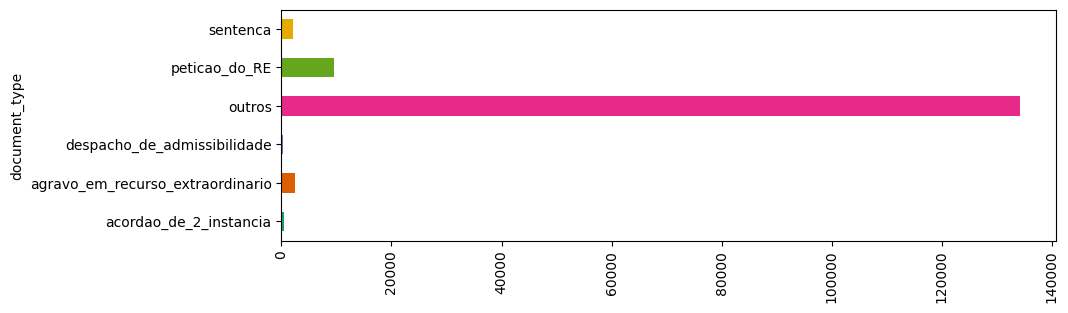

In [ ]:
df.groupby('document_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, 3))
plt.gca().spines[['top', 'right',]]
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_reduzido = df[['document_type', 'body']]
df_reduzido.head()

,document_type,body
0,outros,"{""tribunal justiça estado bahia poder judiciár..."
1,outros,"{""excelentíssimo senhor doutor juiz direito ju..."
2,outros,"{""razões recurso inominado recorrente atlantic..."
3,outros,"{""empresa recorrente tornou credora dos débito..."
4,outros,"{""entretanto verdade parte apelante tornou tit..."


In [ ]:
print(df_reduzido.groupby('document_type').size())

document_type
acordao_de_2_instancia                 553
agravo_em_recurso_extraordinario      2546
despacho_de_admissibilidade            346
outros                              134134
peticao_do_RE                         9509
sentenca                              2129
dtype: int64


In [ ]:
# Amostra de 400 linhas/páginas da classe 'outros'
outros_df = df_reduzido[df_reduzido['document_type'] == 'outros']
amostra_outros = outros_df.sample(n=3000, random_state=42)

# Obtendo linhas que não são 'outros'
sem_outros_df = df_reduzido[df_reduzido['document_type'] != 'outros']

# Concatenando 'outros' com o restante dos dados
df_balanceado = pd.concat([amostra_outros, sem_outros_df])

# df_balanced contém os dados originais com somente 3000 linhas/páginas da classe 'outros'
print(df_balanceado.groupby('document_type').size())

document_type
acordao_de_2_instancia               553
agravo_em_recurso_extraordinario    2546
despacho_de_admissibilidade          346
outros                              3000
peticao_do_RE                       9509
sentenca                            2129
dtype: int64


In [ ]:
df_balanceado.to_csv('/content/drive/MyDrive/Colab Notebooks/df_train_balanceado_full.csv', index=False)

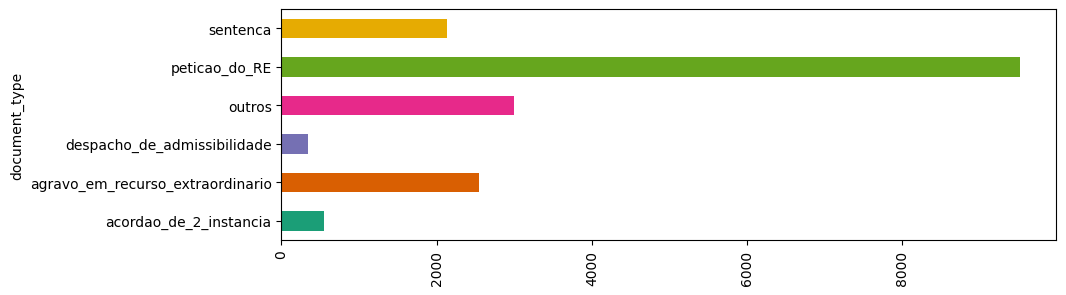

In [ ]:
df_balanceado.groupby('document_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, 3))
plt.gca().spines[['top', 'right',]]
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_balanceado_sem_despacho = df_balanceado[df_balanceado['document_type'] != 'despacho_de_admissibilidade']
print(df_balanceado_sem_despacho.groupby('document_type').size())

document_type
acordao_de_2_instancia               553
agravo_em_recurso_extraordinario    2546
outros                              3000
peticao_do_RE                       9509
sentenca                            2129
dtype: int64


In [ ]:
despachos_df = df_balanceado[df_balanceado['document_type'] == 'despacho_de_admissibilidade']

amostra_um_despacho = despachos_df.sample(n=1, random_state=42)

sem_despacho_df = df_balanceado[df_balanceado['document_type'] != 'despacho_de_admissibilidade']

df_balanceado_um_despacho = pd.concat([amostra_um_despacho, sem_despacho_df])

print(df_balanceado_um_despacho.groupby('document_type').size())


document_type
acordao_de_2_instancia               553
agravo_em_recurso_extraordinario    2546
despacho_de_admissibilidade            1
outros                              3000
peticao_do_RE                       9509
sentenca                            2129
dtype: int64


In [ ]:
amostra_cinco_despachos = despachos_df.sample(n=5, random_state=42)

df_balanceado_cinco_despachos = pd.concat([amostra_cinco_despachos, sem_despacho_df])

print(df_balanceado_cinco_despachos.groupby('document_type').size())

document_type
acordao_de_2_instancia               553
agravo_em_recurso_extraordinario    2546
despacho_de_admissibilidade            5
outros                              3000
peticao_do_RE                       9509
sentenca                            2129
dtype: int64


In [ ]:
df_balanceado_sem_despacho.to_csv('/content/drive/MyDrive/Colab Notebooks/df_balanceado_sem_despacho.csv', index=False)
df_balanceado_um_despacho.to_csv('/content/drive/MyDrive/Colab Notebooks/df_balanceado_um_despacho.csv', index=False)
df_balanceado_cinco_despachos.to_csv('/content/drive/MyDrive/Colab Notebooks/df_balanceado_cinco_despachos.csv', index=False)

In [ ]:
df_balanceado_sem_despacho = df_balanceado[df_balanceado['document_type'] != 'despacho_de_admissibilidade']
print(df_balanceado_sem_despacho.groupby('document_type').size())

In [ ]:
df_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_small.csv')
df_teste_reduzido = df_teste[['document_type', 'body']]
outros_df_teste_reduzido = df_teste_reduzido[df_teste_reduzido['document_type'] == 'outros']
amostra_outros_df_teste = outros_df_teste_reduzido.sample(n=2000, random_state=42)
sem_outros_df_teste = df_teste_reduzido[df_teste_reduzido['document_type'] != 'outros']
df_teste_balanceado = pd.concat([amostra_outros_df_teste, sem_outros_df_teste])
print(df_teste_balanceado.groupby('document_type').size())

df_validacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/validation_small.csv')
df_validacao_reduzido = df_validacao[['document_type', 'body']]
df_validacao_reduzido_sem_despacho = df_validacao_reduzido[df_validacao_reduzido['document_type'] != 'despacho_de_admissibilidade']

outros_df_validacao_reduzido = df_validacao_reduzido[df_validacao_reduzido['document_type'] == 'outros']
amostra_outros_df_validacao = outros_df_validacao_reduzido.sample(n=2000, random_state=42)
sem_outros_df_validacao = df_validacao_reduzido[df_validacao_reduzido['document_type'] != 'outros']
df_validacao_balanceado = pd.concat([amostra_outros_df_validacao, sem_outros_df_validacao])
print(df_validacao_balanceado.groupby('document_type').size())
df_validacao_balanceado_sem_despacho = df_validacao_balanceado[df_validacao_balanceado['document_type'] != 'despacho_de_admissibilidade']
print(df_validacao_balanceado_sem_despacho.groupby('document_type').size())

df_teste_balanceado.to_csv('/content/drive/MyDrive/Colab Notebooks/df_teste_small.csv', index=False)

df_validacao_balanceado.to_csv('/content/drive/MyDrive/Colab Notebooks/df_validacao_small.csv', index=False)
df_validacao_balanceado_sem_despacho.to_csv('/content/drive/MyDrive/Colab Notebooks/df_validacao_small_zsl.csv', index=False)

document_type
acordao_de_2_instancia               273
agravo_em_recurso_extraordinario    1841
despacho_de_admissibilidade          198
outros                              2000
peticao_do_RE                       6331
sentenca                            1475
dtype: int64
document_type
acordao_de_2_instancia               299
agravo_em_recurso_extraordinario    2149
despacho_de_admissibilidade          183
outros                              2000
peticao_do_RE                       6364
sentenca                            1636
dtype: int64
document_type
acordao_de_2_instancia               299
agravo_em_recurso_extraordinario    2149
outros                              2000
peticao_do_RE                       6364
sentenca                            1636
dtype: int64


In [ ]:
!pip install transformers

from transformers import AutoTokenizer

# Carrega o tokenizer
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')

def count_tokens(text):
  return len(tokenizer.encode(text))

# Aplica a função a cada célula da coluna 'VOTO'
df_balanceado['token_count'] = df_balanceado['body'].apply(count_tokens)

# Exibe o DataFrame com a nova coluna
df_balanceado

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,document_type,body,token_count
117999,outros,"{""administrativamente estando fora esfera apre...",269
87192,outros,"{""razões agravo agravante maria lourdes souza ...",230
93971,outros,"{""sentença ora combatida traz como fundamento ...",233
11005,outros,"{""recebemos duso comércio produtos para inform...",446
100850,outros,"{""exmo a juiz federal _____ vara justiça feder...",169
...,...,...,...
149034,peticao_do_RE,"{""logo presente recurso deverá ser provido jul...",95
149058,sentenca,"{""estado rio janeiro poder judiciário tribunal...",260
149059,sentenca,"{""estado rio janeiro poder judiciário tribunal...",82
149110,despacho_de_admissibilidade,"{""poder judiciário estado rio janeiro gabinete...",278


In [ ]:
# Calcula os valores mínimos, máximos e a média da coluna 'token_count'
min_tokens = df_balanceado['token_count'].min()
max_tokens = df_balanceado['token_count'].max()
mean_tokens = df_balanceado['token_count'].mean()

print(f"Mínimo de tokens: {min_tokens}")
print(f"Máximo de tokens: {max_tokens}")
print(f"Média de tokens: {mean_tokens}")

Mínimo de tokens: 6
Máximo de tokens: 2324
Média de tokens: 309.01791738096557


In [ ]:
num_above_512 = df_balanceado[df_balanceado['token_count'] > 512].shape[0]
print(f"\nNumber of texts with more than 512 tokens: {num_above_512}")


Number of texts with more than 512 tokens: 1286


In [ ]:
df_validacao_balanceado['token_count'] = df_validacao_balanceado['body'].apply(count_tokens)

min_tokens_2 = df_validacao_balanceado['token_count'].min()
max_tokens_2 = df_validacao_balanceado['token_count'].max()
mean_tokens_2 = df_validacao_balanceado['token_count'].mean()

print(f"Mínimo de tokens: {min_tokens_2}")
print(f"Máximo de tokens: {max_tokens_2}")
print(f"Média de tokens: {mean_tokens_2}")

num_above_512 = df_balanceado[df_balanceado['token_count'] > 512].shape[0]
print(f"\nNumber of texts with more than 512 tokens: {num_above_512}")

print(f"Total de linhas do dataset: {len(df_validacao_balanceado)}")

Mínimo de tokens: 5
Máximo de tokens: 1228
Média de tokens: 308.4379700736284

Number of texts with more than 512 tokens: 1286
Total de linhas do dataset: 12631


In [ ]:
df_teste_balanceado['token_count'] = df_teste_balanceado['body'].apply(count_tokens)

min_tokens_3 = df_teste_balanceado['token_count'].min()
max_tokens_3 = df_teste_balanceado['token_count'].max()
mean_tokens_3 = df_teste_balanceado['token_count'].mean()

print(f"Mínimo de tokens: {min_tokens_3}")
print(f"Máximo de tokens: {max_tokens_3}")
print(f"Média de tokens: {mean_tokens_3}")

num_above_512 = df_teste_balanceado[df_teste_balanceado['token_count'] > 512].shape[0]
print(f"\nNumber of texts with more than 512 tokens: {num_above_512}")

print(f"Total de linhas do dataset: {len(df_teste_balanceado)}")

Mínimo de tokens: 6
Máximo de tokens: 1751
Média de tokens: 310.8498101997029

Number of texts with more than 512 tokens: 861
Total de linhas do dataset: 12118


In [ ]:

print(f"Total de linhas do dataset: {len(df_balanceado)}")

Total de linhas do dataset: 18083
